In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/home/fractaluser/Downloads/driver_n_rollout')
pd.set_option('display.max_columns', None)
sns.set(font_scale = 1, style = 'whitegrid')
from sklearn.metrics import mean_squared_error
import time

In [28]:
data = pd.read_csv('adult.csv')

In [29]:
data.head()

,age,workclass,education,marital_status,employment,relationship,race,gender,workhours,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


In [30]:
data = data.drop(labels = ['employment', 'relationship'], axis = 1)

In [31]:
data = data[(data.education != ' 11th') & (data.education != ' Assoc-voc') & (data.education != ' Assoc-acdm')
           & (data.education != ' 7th-8th') & (data.education != ' Prof-school') & (data.education != ' 9th') 
           & (data.education != ' 5th-6th') & (data.education != ' 1st-4th') & (data.education != ' Preschool') 
           & (data.marital_status != ' Married-AF-spouse') & (data.workclass != ' ?') 
           & (data.workclass != ' Self-emp-not-inc') & (data.workclass != ' Self-emp-inc')].reset_index(drop = True)

In [32]:
data.head()

,age,workclass,education,marital_status,race,gender,workhours,income
0,39,State-gov,Bachelors,Never-married,White,Male,40,<=50K
1,38,Private,HS-grad,Divorced,White,Male,40,<=50K
2,28,Private,Bachelors,Married-civ-spouse,Black,Female,40,<=50K
3,37,Private,Masters,Married-civ-spouse,White,Female,40,<=50K
4,31,Private,Masters,Never-married,White,Female,50,>50K


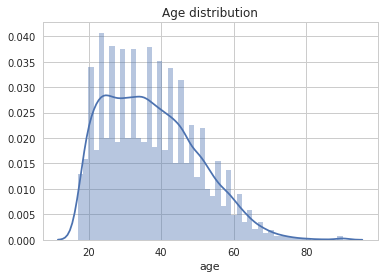

In [33]:
plt.title('Age distribution')
sns.distplot(data.age)
plt.show()

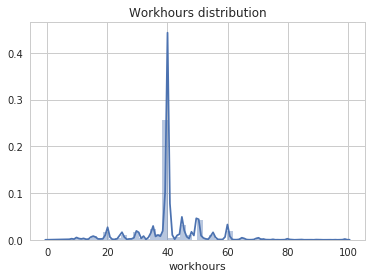

In [34]:
plt.title('Workhours distribution')
sns.distplot(data.workhours)
plt.show()

In [35]:
import random, time

In [36]:
lift = []
for i in range(len(data)):
    if data.workclass[i] == ' Private' and data.education[i]==' HS-grad' and data.marital_status[i]==' Married-civ-spouse' and data.age[i]>16 and data.age[i]<28 and data.gender[i] == 'Female':
        lift.append(np.round(random.gauss(-.7, .01), 2))
    elif data.workclass[i] == ' Local-gov' and data.education[i] == ' Some-college' and data.marital_status[i] == ' Never-married' and data.age[i]>28 and data.age[i]<40 and data.gender[i] == 'Female':
        lift.append(np.round(random.gauss(-.3, 0.01), 2))
    elif data.workclass[i] == ' State-gov' and data.education[i] == ' Bachelors' and data.marital_status[i] == ' Divorced' and data.age[i]>40 and data.age[i]<52 and data.gender[i] == 'Female':
        lift.append(0)
    elif data.workclass[i] == ' Federal-gov' and data.education[i] == ' Masters' and data.marital_status[i] == ' Seperated' and data.age[i]>52 and data.age[i]<64 and data.gender[i] == 'Male':
        lift.append(np.round(random.gauss(0.3, 0.01), 2))
    elif data.workclass[i] == ' Without-pay' and data.education[i] == ' 10th' and data.marital_status[i] == ' Widowed' and data.age[i]>64 and data.age[i]<76 and data.gender[i] == 'Male':
        lift.append(np.round(random.gauss(0.7, 0.01), 2))
    elif data.workclass[i] == ' Never-worked' and data.education[i] == ' 12th' and data.marital_status[i] == ' Married-spouse-absent' and data.age[i]>76 and data.age[i]<90 and data.gender[i] == 'Male':
        lift.append(np.round(random.gauss(1,.01), 2))
    else:
        lift.append(np.round(random.gauss(0,0.25), 2))

In [37]:
complete_data = data.copy()
complete_data['lift'] = pd.DataFrame({'lift':lift})

In [38]:
change = complete_data.sample(2000).index
complete_data.loc[change,'lift'] = 0

In [39]:
complete_data.head()

,age,workclass,education,marital_status,race,gender,workhours,income,lift
0,39,State-gov,Bachelors,Never-married,White,Male,40,<=50K,0.00
1,38,Private,HS-grad,Divorced,White,Male,40,<=50K,0.13
2,28,Private,Bachelors,Married-civ-spouse,Black,Female,40,<=50K,-0.21
3,37,Private,Masters,Married-civ-spouse,White,Female,40,<=50K,-0.45
4,31,Private,Masters,Never-married,White,Female,50,>50K,0.22


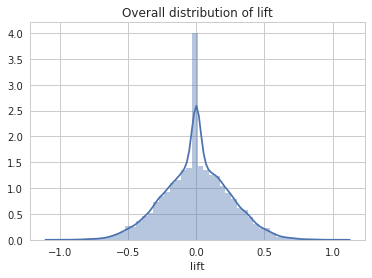

In [40]:
plt.title('Overall distribution of lift')
sns.distplot(complete_data.lift)
plt.show()

In [41]:
numerical_data = complete_data.copy()

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
lbl1 = LabelEncoder()
numerical_data.gender = lbl1.fit_transform(numerical_data.gender)

lbl2 = LabelEncoder()
numerical_data.income = lbl2.fit_transform(numerical_data.income)

lbl3 = LabelEncoder()
numerical_data.marital_status = lbl3.fit_transform(numerical_data.marital_status)

lbl4 = LabelEncoder()
numerical_data.race = lbl4.fit_transform(numerical_data.race)

lbl5 = LabelEncoder()
numerical_data.workclass = lbl5.fit_transform(numerical_data.workclass)

In [44]:
data.education.value_counts()

 HS-grad         8813
 Some-college    6062
 Bachelors       4507
 Masters         1472
 10th             747
 12th             367
 Doctorate        313
Name: education, dtype: int64

In [45]:
numerical_data.education.replace([' 10th', ' 12th', ' HS-grad', ' Some-college', 
                                 ' Bachelors', ' Masters', ' Doctorate'], [1, 2, 3, 4, 5, 6, 7], inplace = True)

In [46]:
numerical_data.head()

,age,workclass,education,marital_status,race,gender,workhours,income,lift
0,39,4,5,3,4,1,40,0,0.00
1,38,3,3,0,4,1,40,0,0.13
2,28,3,5,1,2,0,40,0,-0.21
3,37,3,6,1,4,0,40,0,-0.45
4,31,3,6,3,4,0,50,1,0.22


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [48]:
kmeans = KMeans(n_clusters = 6, random_state = 1)
clustering_model = kmeans.fit(numerical_data[(numerical_data.lift != 0)])

In [49]:
data_wo_zero_lift = numerical_data[(numerical_data.lift !=0)]

In [52]:
data_w_zero_lift = numerical_data[(numerical_data.lift==0)]

In [53]:
clusters_1 = clustering_model.predict(data_wo_zero_lift)
clusters_2 = clustering_model.predict(data_w_zero_lift)

In [55]:
data_wo_zero_lift['cluster'] = pd.DataFrame({'cluster':})

array([1, 4, 0, ..., 3, 2, 3], dtype=int32)

In [ ]:
training = numerical_data.drop(labels = ['lift', 'workhours'], axis = 1)
target = numerical_data['lift']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xdata, xtest, ydata, ytest = train_test_split(training, target, test_size = 0.1, random_state = 1)
xdata = xdata.reset_index(drop = True)
xtest = xtest.reset_index(drop = True)
ydata = ydata.reset_index(drop = True)
ytest = ytest.reset_index(drop = True)

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(xdata, ydata, test_size = 0.25, random_state = 1)
xtrain = xtrain.reset_index(drop = True)
xval = xval.reset_index(drop = True)
ytrain = ytrain.reset_index(drop = True)
yval = yval.reset_index(drop = True)

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
trial1 = time.time()
linear_model = LassoCV(eps=0.001, n_alphas=100, fit_intercept=True, precompute='auto', max_iter=1000 ,cv=2, n_jobs=-1, random_state=1, selection='cyclic')
regress = linear_model.fit(xdata, ydata)
print('Processing time =', time.time()-trial1, 'seconds')

In [ ]:
lasso_performance = regress.predict(xtest)

In [ ]:
print('Error after lasso =', (mean_squared_error(ytest, lasso_performance))**0.5)

In [ ]:
print('Lasso reg. coefficients ->',regress.coef_)

In [ ]:
import xgboost as xgb

In [ ]:
trial2 = time.time()
params = {"objective":"reg:linear",
          "booster":"gbtree",
          "eta":0.1,
          "max_depth": 3,
         "subsample":0.75,
         "silent":0,
         "seed":1,
         "lambda":.25,
         "alpha":.1}

num_boost_round = 1000

dtrain = xgb.DMatrix(xtrain, ytrain)
dvalid = xgb.DMatrix(xval, yval)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

booster = xgb.train(params, dtrain, num_boost_round, evals = watchlist, early_stopping_rounds = 25, verbose_eval=10)
print('Processing time =', time.time()-trial2, 'seconds')

In [ ]:
performance = booster.predict(xgb.DMatrix(xtest))

In [ ]:
print('Error on test set =', mean_squared_error(ytest, performance)**.5)

In [ ]:
complete_lift_prediction = booster.predict(xgb.DMatrix(training))

In [ ]:
complete_data['predicted_lift'] = pd.DataFrame({'predicted_lift':complete_lift_prediction})

In [ ]:
complete_data.age = pd.cut(complete_data.age, 5)

In [ ]:
xgb.plot_importance(booster, xlabel='Importance', ylabel='Features')
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Violinplot - lift vs age')
sns.violinplot(x="age", y="predicted_lift", data=complete_data, hue="gender", split = True)
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Violinplot - lift vs age')
sns.violinplot(x="age", y="predicted_lift", data=complete_data, hue="income", split = True)
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Violinplot - lift vs marital status')
sns.violinplot(x="marital_status", y="predicted_lift", data=complete_data, hue = "gender",
              split = True)
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Violinplot - lift vs marital status')
sns.violinplot(x="marital_status", y="predicted_lift", data=complete_data, hue = "income",
              split = True)
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Violinplot - lift vs marital status')
sns.violinplot(x="education", y="predicted_lift", data=complete_data, hue = "gender",
              split = True)
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Violinplot - lift vs marital status')
sns.violinplot(x="education", y="predicted_lift", data=complete_data, hue = "income",
              split = True)
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Pointplot - lift vs age')
sns.pointplot(x="age", y="predicted_lift", data=complete_data, hue = 'marital_status')
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Pointplot - lift vs age')
sns.pointplot(x="age", y="predicted_lift", data=complete_data, hue = 'education')
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Pointplot - lift vs age')
sns.pointplot(x="age", y="predicted_lift", data=complete_data, hue = 'workclass')
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Pointplot - lift vs age')
sns.pointplot(x="age", y="predicted_lift", data=complete_data, hue = 'race')
plt.show()

In [ ]:
order_of_rolling_out = complete_data.copy()

In [ ]:
order_of_rolling_out = order_of_rolling_out.sort_values(by='predicted_lift', ascending = False).reset_index(drop = True)

In [ ]:
order_of_rolling_out.head(10)